In [48]:
%load_ext autoreload
%autoreload 2

import sys
from os.path import join, dirname, abspath,splitext,split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

config_dir = "../config"
if config_dir not in sys.path:
    sys.path.insert(0, config_dir)

from config import add_to_path, root_dir
add_to_path(join(root_dir, 'src'))

import utils.filter as filter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Already in sys: d:\GMM 4\Reading seminar\Reading-Seminar-anomaly-detection\src


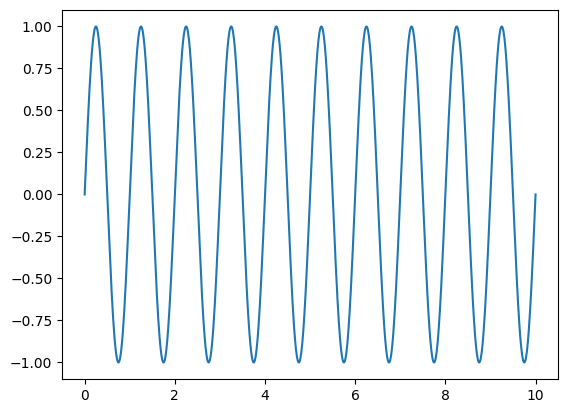

In [49]:
# Create a sinusoidal signal

N = 1000
xx = np.linspace(0, 10, N)
signal = np.sin(xx*2*np.pi)
plt.plot(xx,signal)
plt.show()

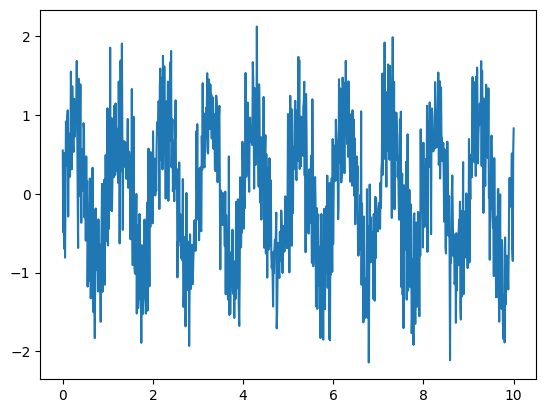

In [50]:
# Add white noise to the signal to obtain the observed signal.
var = 0.5
obs = signal + var*np.random.randn(N)
plt.plot(xx,obs)
plt.show()

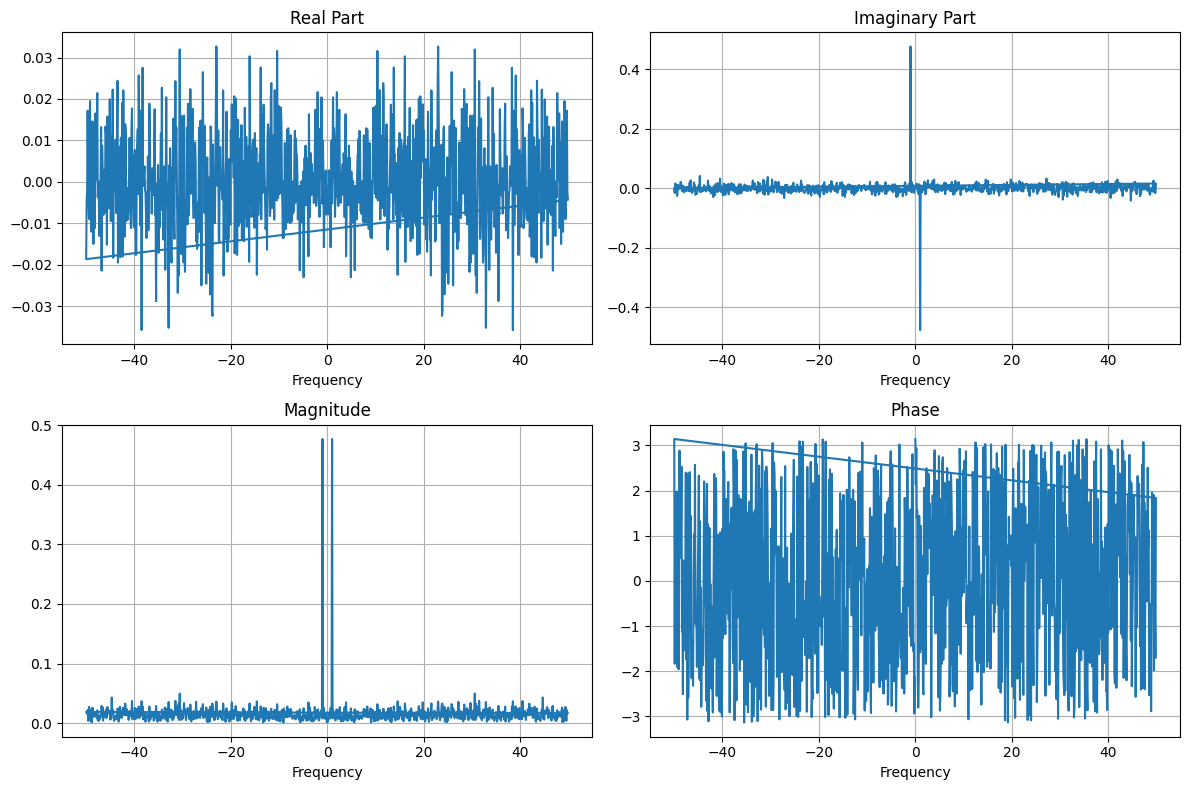

In [51]:
# plot the Fourier spectrum of the observed signal.

filter.fourier_plot(obs, fs=1/xx[1])

## Moving average

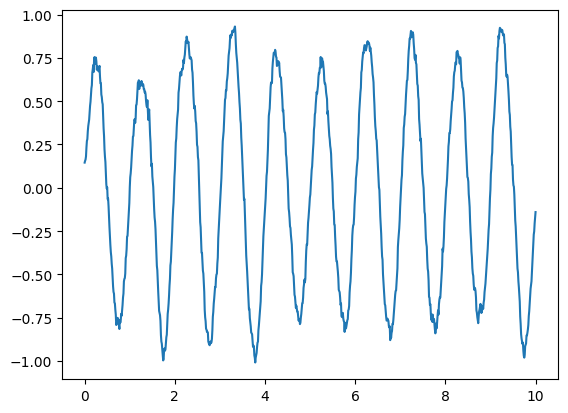

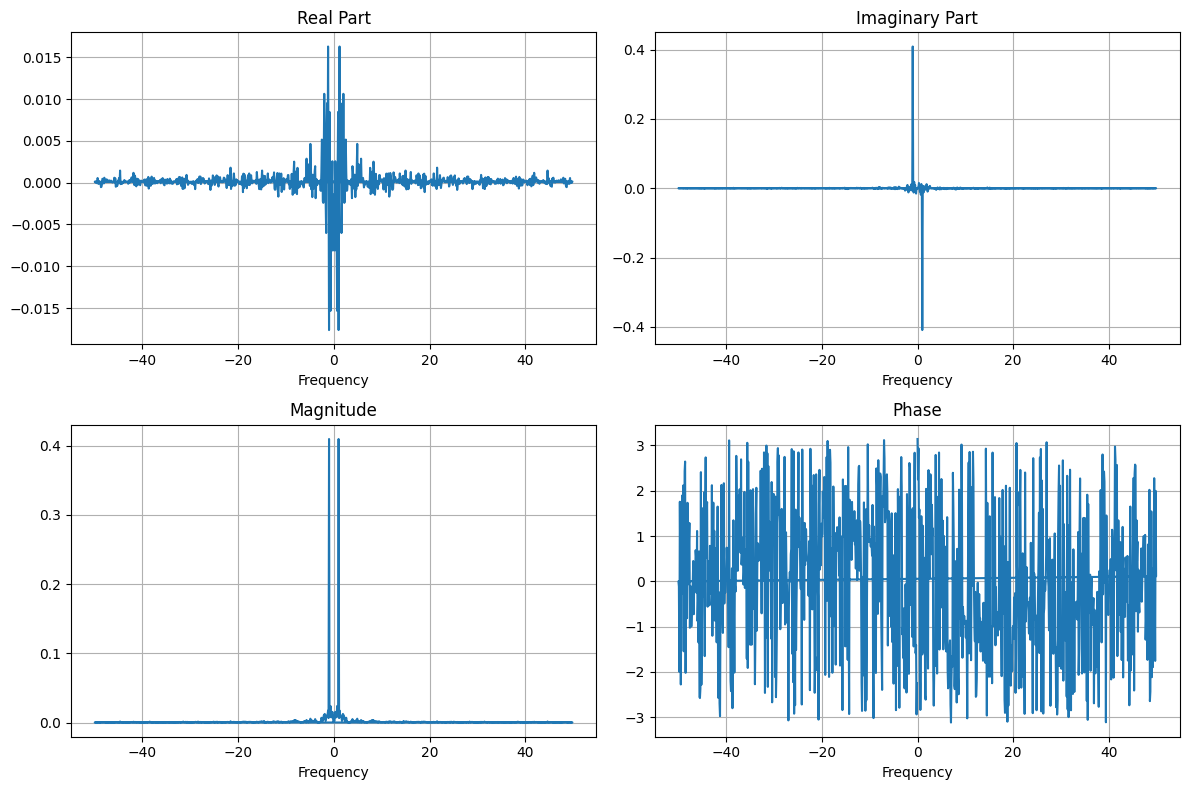

In [57]:
# Denoise the signal using moving average filter and plot the Fourier spectrum of the denoised signal.
# w : size of the moving window. The larger w is, the smoother the signal is.
filtered = filter.moving_average(obs, w=30)
plt.plot(xx,filtered)
plt.show()
filter.fourier_plot(filtered, fs=1/xx[1])

## Low pass filter using Fourier

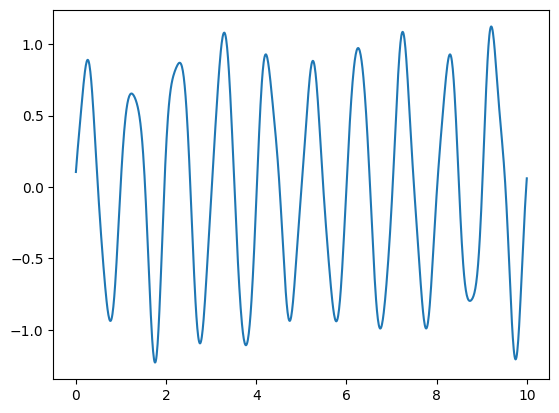

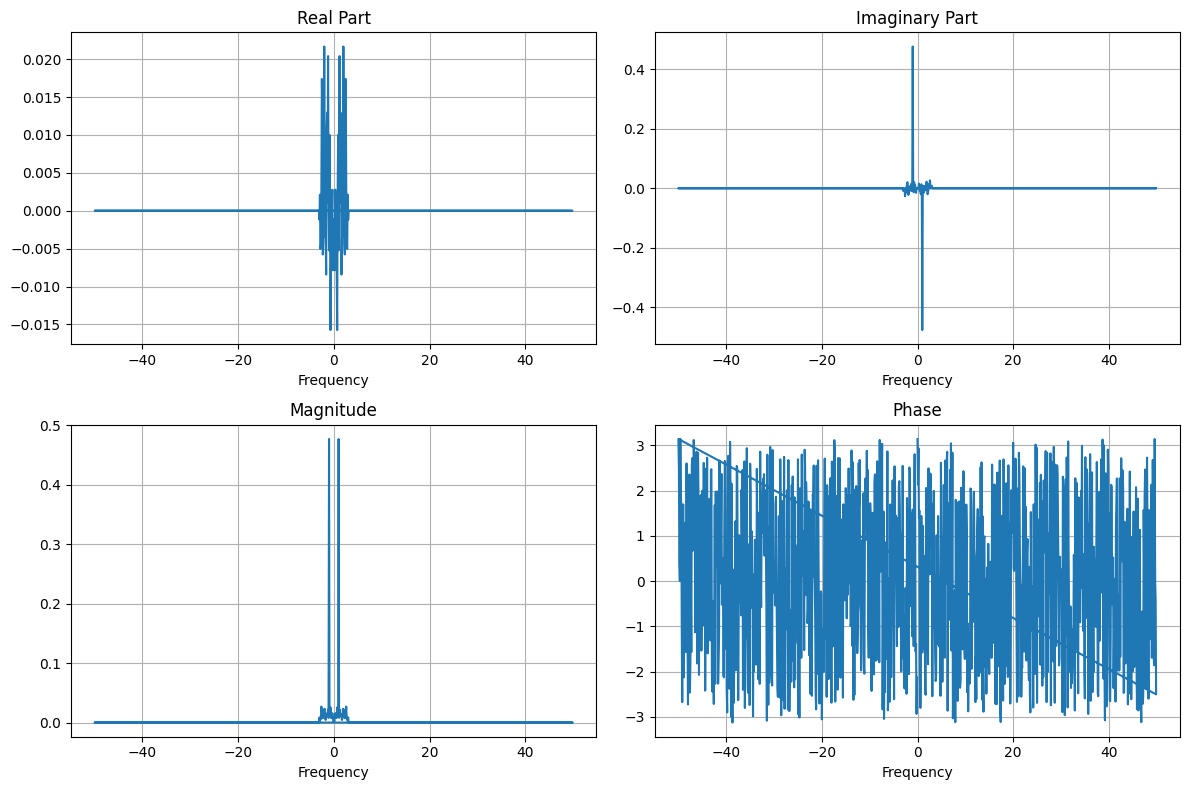

In [53]:
fourier = filter.fourier_low_pass(obs, fs=1/xx[1], cutoff=3)
plt.plot(xx,fourier)
plt.show()
filter.fourier_plot(fourier, fs=1/xx[1])

## Spectral thresholding

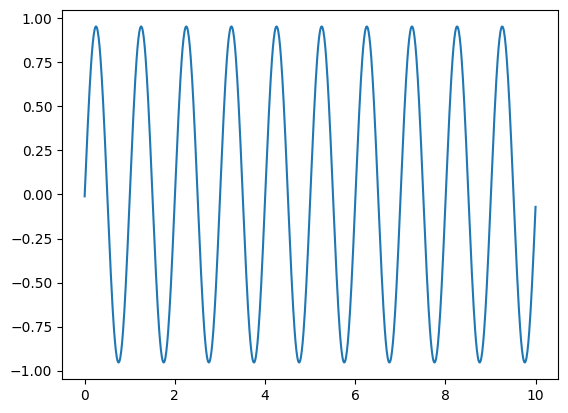

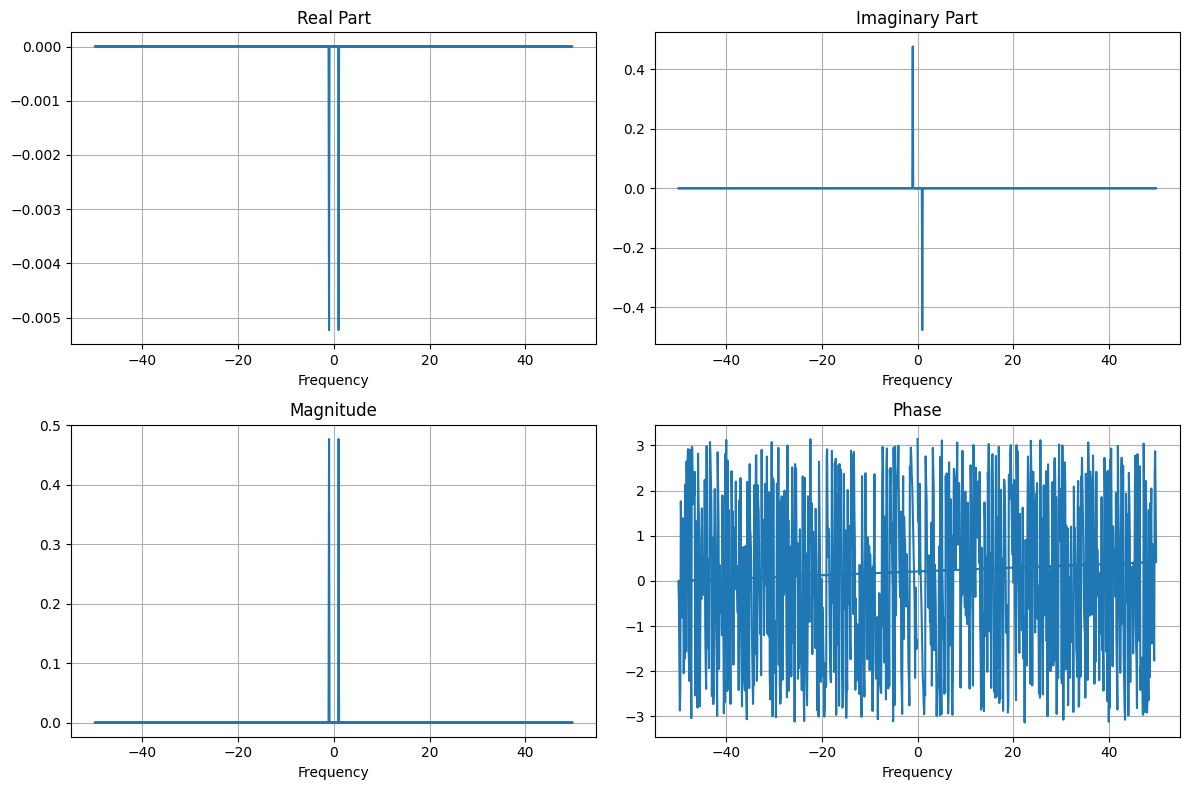

In [54]:
# Denoise the signal using thresholding in the Fourier domain and plot the Fourier spectrum of the denoised signal.

denoised = filter.fourier_denoise(obs, magnitude = 0.1)
plt.plot(xx,denoised)
plt.show()
filter.fourier_plot(denoised, fs=1/xx[1])

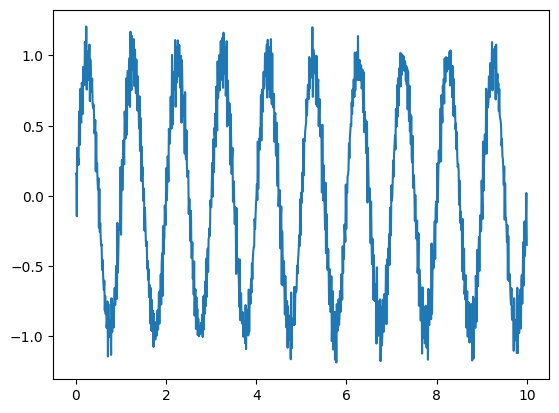

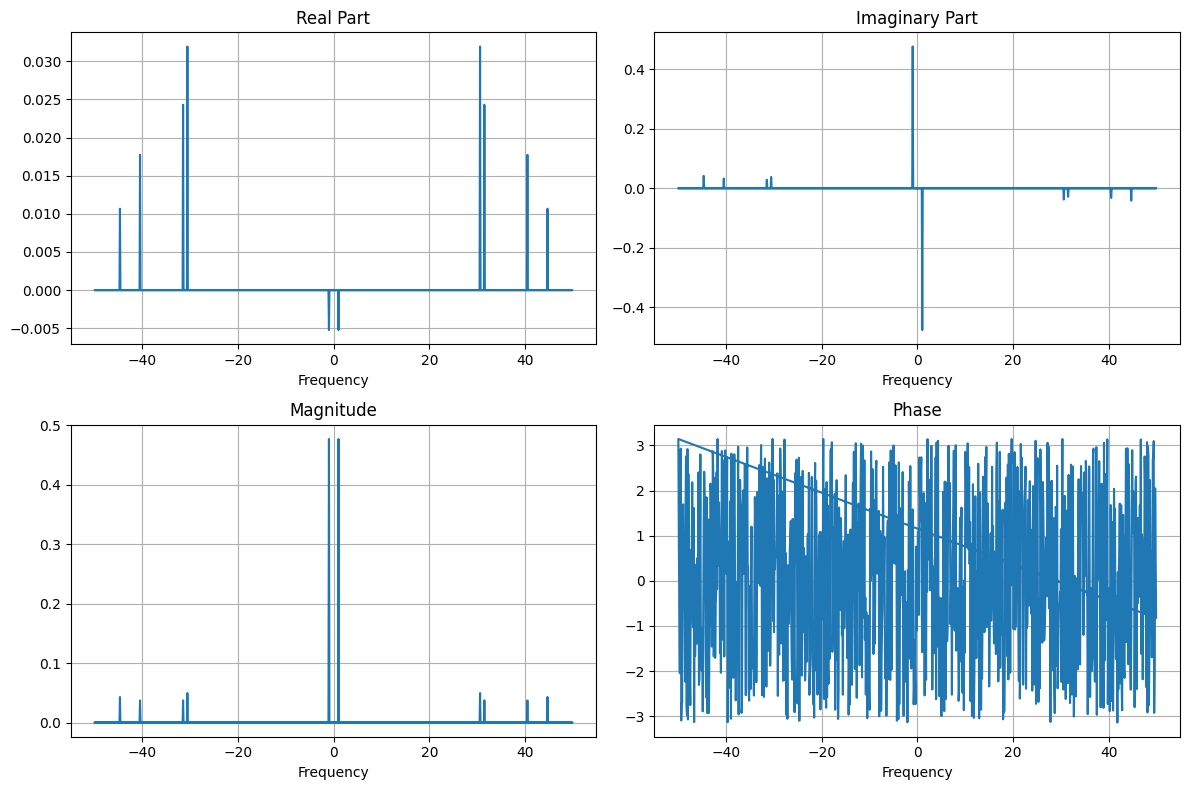

In [55]:
# Denoise the signal by keeping the top p% of the Fourier coefficients and plot the Fourier spectrum of the denoised signal.
p = 0.01
denoised = filter.fourier_denoise(obs, keep_ratio = p)
plt.plot(xx,denoised)
plt.show()
filter.fourier_plot(denoised, fs=1/xx[1])